# Impact of weather on ride frequency
The purpose of this project is to determine whether weather conditions will affect the frequency of driving. This analysis will help improve Zuber's navigation for drivers based on different weather conditions to reduce the average time for the passenger travelling from one place to another. 

## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st
from functools import reduce
import re

In [3]:
# Load the data files into different DataFrames
try:
    df_taxi = pd.read_csv('project_sql_result_01.csv')
    df_do = pd.read_csv('project_sql_result_04.csv')
    df_ts = pd.read_csv('project_sql_result_07.csv')
except:
    df_taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
    df_do = pd.read_csv('/datasets/project_sql_result_04.csv')
    df_ts = pd.read_csv('/datasets/project_sql_result_07.csv')

## Data exploration

In [4]:
# Company name and total trips count
df_taxi.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# Dropoff location and Average trips count
df_do.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Weather condition and ride duration
df_ts.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [7]:
# Dataframe info
df_taxi.info()
print()
df_do.info()
print()
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_

In [8]:
# Converting start_ts datatype to Datetime
df_ts['start_ts']=pd.to_datetime(df_ts['start_ts'])
df_ts.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [9]:
# Top 10 Taxi Company
df_taxi.sort_values(by='trips_amount',ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [10]:
# Percentage of Flash Cab in Taxi market.
df_taxi['trips_amount'][0]/df_taxi['trips_amount'].sum()

0.14243578446009425

In [11]:
# Top 10 dropoff location
df_do.sort_values(by='average_trips',ascending=False).round(2).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


In [12]:
# Weather condition ratio
len(df_ts[df_ts['weather_conditions'] == 'Bad'])/len(df_ts)

0.16853932584269662

In [13]:
df_ts.groupby(['weather_conditions']).mean().T.astype(int)

weather_conditions,Bad,Good
duration_seconds,2427,1999


## Exploratory Data Analysis

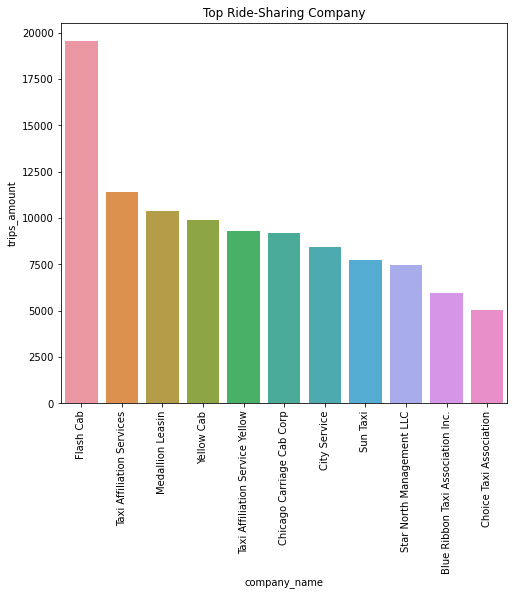

In [14]:
# Top ride-sharing company
plt.subplots(figsize=(8,7))
sns.barplot(x='company_name',y="trips_amount"
            , data=df_taxi[df_taxi['trips_amount']>5000]).set(title='Top Ride-Sharing Company')
plt.xticks(rotation=90);

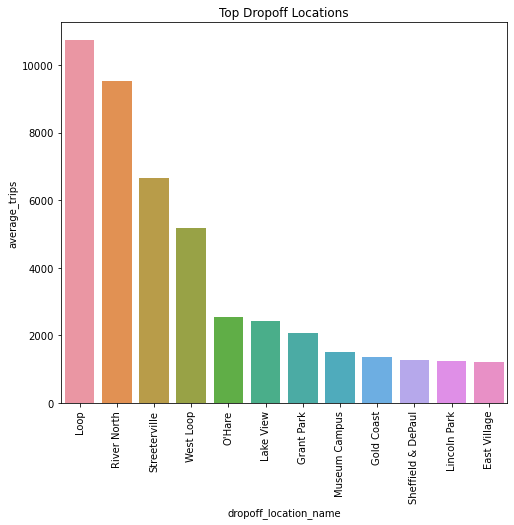

In [15]:
# Top dropoff location
plt.subplots(figsize=(8,7))
sns.barplot(x='dropoff_location_name',y="average_trips"
            , data=df_do[df_do['average_trips']>1200]).set(title='Top Dropoff Locations')
plt.xticks(rotation=90);

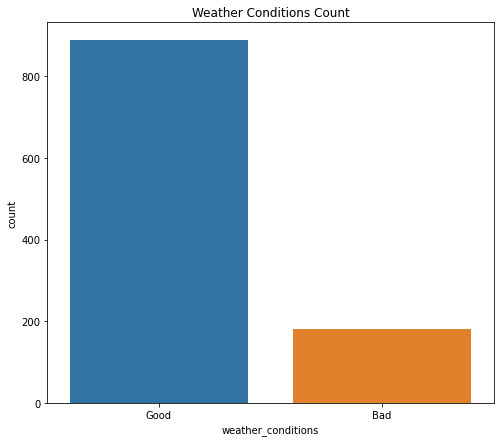

In [16]:
# Weather condition distribution
plt.subplots(figsize=(8,7))
sns.countplot(x ='weather_conditions', data = df_ts).set(title='Weather Conditions Count');

In [17]:
# Getting Rid of Outliers
column = np.zeros(len(df_ts), dtype=bool) + True
for outliers in ['duration_seconds']:
    Q1 = df_ts[outliers].quantile(0.25)
    Q3 = df_ts[outliers].quantile(0.75)
    IQR = Q3-Q1
    upper_outliers = Q3+1.5*IQR 
    column[np.where(df_ts[outliers]>upper_outliers)]=False
df_ts2 = df_ts[column]
df_ts2.reset_index(drop=True, inplace=True);

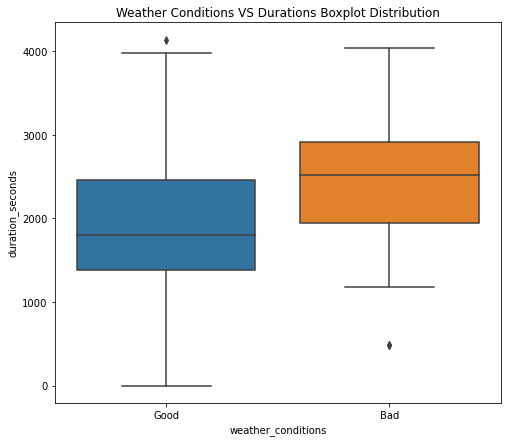

In [18]:
plt.figure(figsize=(8,7))
sns.boxplot(x='weather_conditions',
            y='duration_seconds',data=df_ts2).set(title='Weather Conditions VS Durations Boxplot Distribution');

### Data exploration Summaries

Taxi company "Flash Cab" has dominated the current share of the local Chicago market, followed by the company "Taxi Affiliation Services". The site "Loop" ranked as the highest drop-off place, "River North". Data is collected in "Good" weather conditions compared to "Bad" weather conditions. The ratio of Good to Bad weather is about 2:10. The above boxplot shows that ridesharing during Bad weather conditions took longer to arrive at the destination. 

## Statistically Data Analysis

### Null Hypothesis Testing

H0: The average duration of rides from the Loop to O'Hare International Airport doesn't changes on rainy Saturdays.

H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [19]:
# Creating samples for different weather conditions
rainyday = df_ts[df_ts['weather_conditions'] == 'Bad']['duration_seconds']
clearday = df_ts[df_ts['weather_conditions'] == 'Good']['duration_seconds']

In [20]:
# T test function for null hypotheses testing.
def t_test(sample1,sample2,alpha= 0.05):
    p_value=st.ttest_ind(sample1, sample2,nan_policy='omit').pvalue
    print('p_value =',p_value)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and\
 sample 2 are not the same")

In [21]:
t_test(rainyday,clearday,alpha=0.01)

p_value = 6.517970327099473e-12
Reject H0: average of sample 1 is not equal to average of sample 2


## Conclusions


The hypothesis tested and concluded that the average length of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. Because of the smaller size of the two samples, I tested the Null hypothesis with a smaller 0.01 alpha. However, even with smaller alpha, the difference between the two samples is still significant, as shown in the boxplot chart above. Pleasant weather shows an average of 2427 seconds (about 40 and a half minutes), and severe weather shows 1999 seconds (about 33 and a half minutes). Therefore, we can conclude that rainy weather can have an impact on external factors on rides.
  
As far as taxi companies are concerned, "Flash Cab" is the favorite of the local market in Chicago. They could offer better service and drop a customer at the desired location for a shorter period. However, without enough data for further analysis, it is difficult to conclude what makes "Flash Cab" at the top of the ride-sharing market. Location Loop and River North might be close to each other to have short average drop-off trips count, both locations have some attraction spot that attracts people to get there, or it could be they have a higher or denser population on those locations, without enough data for further analysis, is hard to make any solid conclusion based on the given data. 

 